<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/CV-2025/blob/main/Week_02/Linear_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

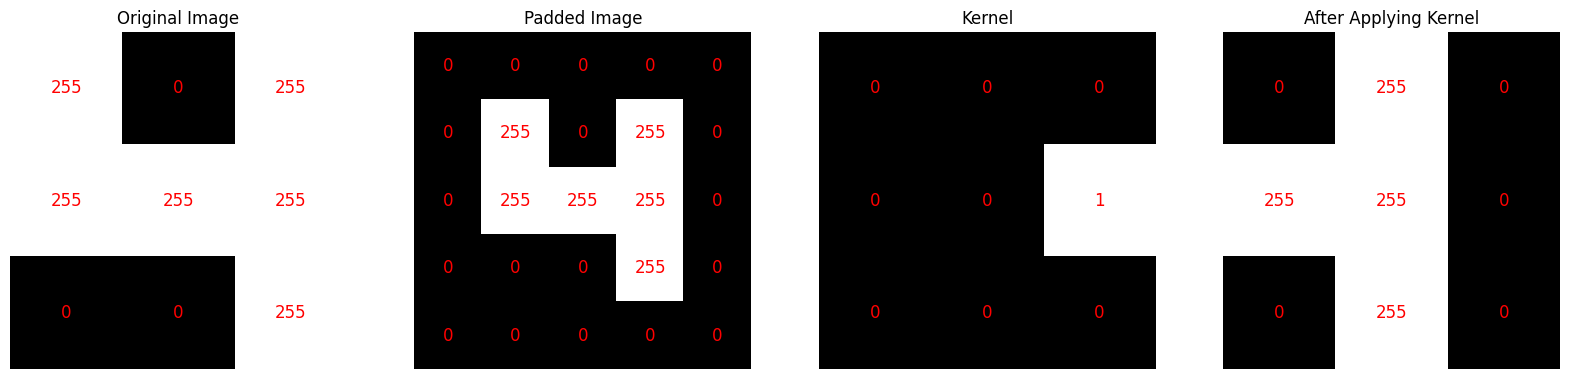

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the image and kernel (using 0 and 255 for pixel values)
img = np.array([[255, 0, 255],
                [255, 255, 255],
                [0, 0, 255]])

linear_kernel = np.array([[0, 0, 0],
                          [0, 0, 1],
                          [0, 0, 0]])

# Function to pad the image
def pad_image(image, kernel):
    # Get dimensions of the kernel
    kernel_height, kernel_width = kernel.shape

    # Calculate padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    return padded_image

# Function to apply convolution
def apply_convolution(image, kernel):
    # Get dimensions of the image and kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Pad the image to handle edges
    padded_image = pad_image(image, kernel)

    # Initialize the output image
    output = np.zeros_like(image, dtype=float)

    # Perform convolution
    for i in range(img_height):
        for j in range(img_width):
            output[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output, padded_image

# Apply the kernel to the image
result, padded_img = apply_convolution(img, linear_kernel)

# Clip the result to ensure pixel values are between 0 and 255
result = np.clip(result, 0, 255).astype(np.uint8)

# Visualize the original, padded, kernel, and resulting images
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Add pixel values as text annotations for the original image
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        plt.text(j, i, f"{img[i, j]}", ha="center", va="center", color="red", fontsize=12)

# Padded Image
plt.subplot(1, 4, 2)
plt.title("Padded Image")
plt.imshow(padded_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Add pixel values as text annotations for the padded image
for i in range(padded_img.shape[0]):
    for j in range(padded_img.shape[1]):
        plt.text(j, i, f"{padded_img[i, j]}", ha="center", va="center", color="red", fontsize=12)

# Kernel
plt.subplot(1, 4, 3)
plt.title("Kernel")
plt.imshow(linear_kernel, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

# Add kernel values as text annotations
for i in range(linear_kernel.shape[0]):
    for j in range(linear_kernel.shape[1]):
        plt.text(j, i, f"{linear_kernel[i, j]}", ha="center", va="center", color="red", fontsize=12)

# Resulting Image
plt.subplot(1, 4, 4)
plt.title("After Applying Kernel")
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Add pixel values as text annotations for the resulting image
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        plt.text(j, i, f"{result[i, j]}", ha="center", va="center", color="red", fontsize=12)

plt.show()